<a href="https://colab.research.google.com/github/Dineshscet/Au622421104011/blob/main/ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

     length  protocol  start_time    end_time   label
0       152         1  1627545936  1627546109  attack
1       485         1  1627545981  1627546154  normal
2       398         6  1627545835  1627546147  attack
3       320         1  1627545691  1627546103  normal
4       156         6  1627545620  1627546081  normal
..      ...       ...         ...         ...     ...
995      79         6  1627545868  1627546127  attack
996     296         6  1627545857  1627546158  attack
997     155        17  1627545628  1627546107  attack
998     100        17  1627545812  1627546123  attack
999     130        17  1627545882  1627546149  attack

[1000 rows x 5 columns]


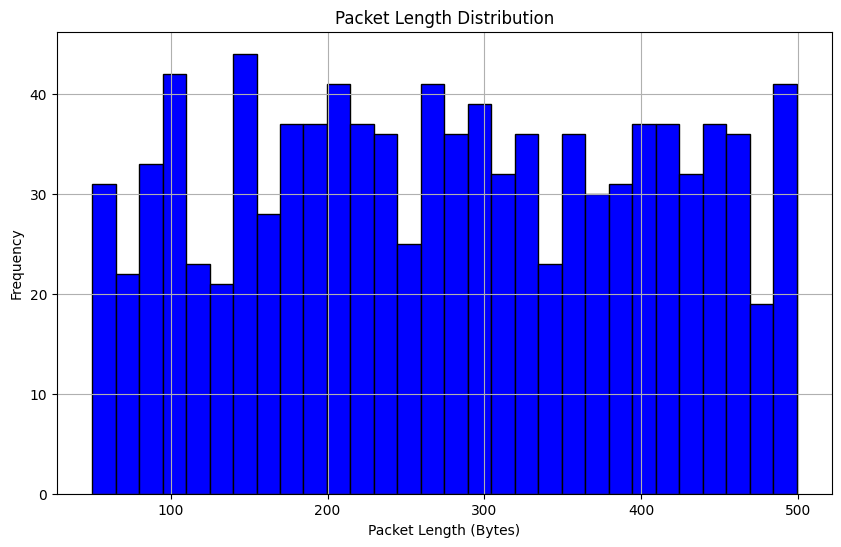

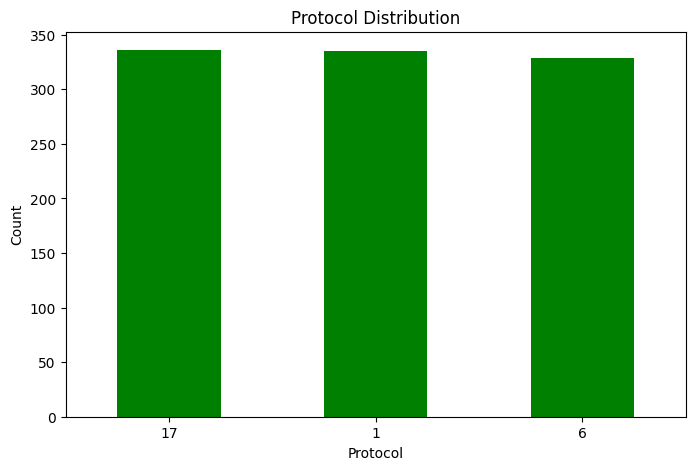

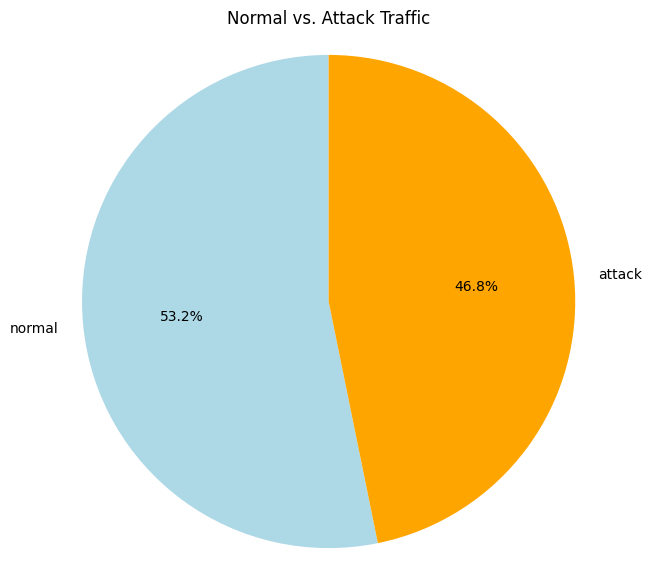

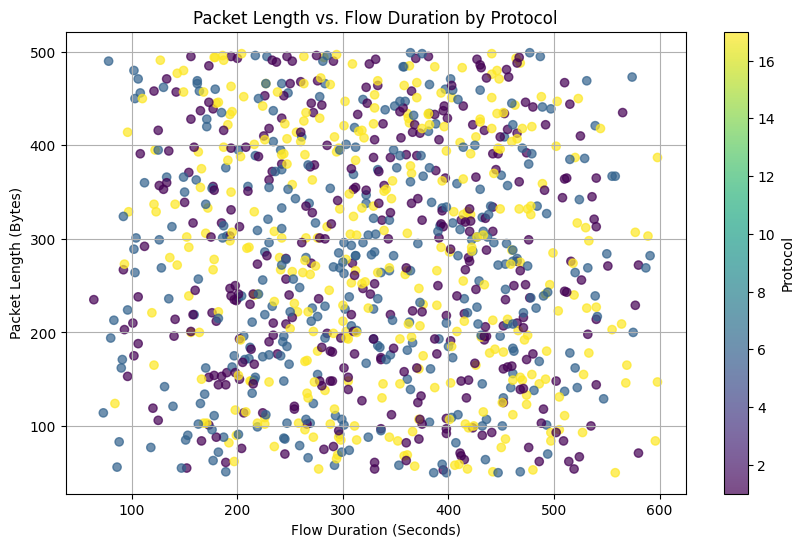

Classification Report:
              precision    recall  f1-score   support

      attack       0.51      0.46      0.48        96
      normal       0.54      0.60      0.57       104

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200

Confusion Matrix:
[[44 52]
 [42 62]]
Threats removed.


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('Network_intrusion.csv')

print(data)

df = pd.DataFrame(data)

df.to_csv('Network_intrusion.csv', index=False)

df = pd.read_csv('Network_intrusion.csv')

df.dropna(inplace=True)

df['protocol'] = df['protocol'].astype('category').cat.codes

df['flow_duration'] = df['start_time'] - df['end_time']

features = ['length', 'protocol', 'flow_duration']
X = df[features]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

df = pd.read_csv('Network_intrusion.csv')

plt.figure(figsize=(10, 6))
plt.hist(df['length'], bins=30, color='blue', edgecolor='black')
plt.title('Packet Length Distribution')
plt.xlabel('Packet Length (Bytes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

protocol_counts = df['protocol'].value_counts()
plt.figure(figsize=(8, 5))
protocol_counts.plot(kind='bar', color='green')
plt.title('Protocol Distribution')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

label_counts = df['label'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Normal vs. Attack Traffic')
plt.axis('equal')
plt.show()

df['flow_duration'] = df['end_time'] - df['start_time']
plt.figure(figsize=(10, 6))
plt.scatter(df['flow_duration'], df['length'], c=df['protocol'], cmap='viridis', alpha=0.7)
plt.title('Packet Length vs. Flow Duration by Protocol')
plt.xlabel('Flow Duration (Seconds)')
plt.ylabel('Packet Length (Bytes)')
plt.colorbar(label='Protocol')
plt.grid(True)
plt.show()


print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



test_df = X_test.copy()
test_df['predicted_label'] = y_pred
test_df['actual_label'] = y_test.values

threats = test_df[test_df['predicted_label'] == 'attack']
'''print("Totlal no of threats:",threats)
total_threats=df[df['label']=='attack'].shape[0]
print(f"total number of threats{total_threats : }")'''

if not threats.empty:

    df_cleaned = df[~df.index.isin(threats.index)]
    print("Threats removed.")

    df_cleaned.to_csv('network_traffic_cleaned.csv', index=False)
else:
    print("No threats detected in the test set.")


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


X = np.array([[1], [2], [3], [4], [5]])
y = np.array([150, 200, 250, 300, 350])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 8.077935669463161e-28


In [16]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris.data
y = (iris.target != 0) * 1


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [18]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [19]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [20]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [24]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


iris = load_iris()
X=iris.data
y-iris.target

X_train,y_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [31]:
import numpy as np
arr = np.array([1, 2, 3, 4, 5])

print("Sum:", np.sum(arr))
print("Product:", np.prod(arr))
print("Maximum:", np.max(arr))
print("Minimum:", np.min(arr))
reshaped_arr = np.reshape(arr, (5, 1))
print("Reshaped array:\n", reshaped_arr)

a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
print("Dot product:\n", np.dot(a, b))

random_arr = np.random.rand(3)
print("Random array:", random_arr)

print("Variance:", np.var(arr))

Sum: 15
Product: 120
Maximum: 5
Minimum: 1
Reshaped array:
 [[1]
 [2]
 [3]
 [4]
 [5]]
Dot product:
 [[19 22]
 [43 50]]
Random array: [0.18426883 0.8419924  0.74550385]
Variance: 2.0


In [54]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Network = pd.read_csv('/content/drive/MyDrive/Network_intrusion.csv')
df=pd.DataFrame(Network)
print(Network)
df.to_csv('Network_intrusion.csv',index=False)
df.dropna(inplace=True)
df['start_time'].fillna(df['start_time'].mean(), inplace=True)
print(df)
df['label'].replace({'attack': 1, 'normal': 0}, inplace=True)
print(df)
df.describe()






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     length  protocol  start_time    end_time   label
0       152         1  1627545936  1627546109  attack
1       485         1  1627545981  1627546154  normal
2       398         6  1627545835  1627546147  attack
3       320         1  1627545691  1627546103  normal
4       156         6  1627545620  1627546081  normal
..      ...       ...         ...         ...     ...
995      79         6  1627545868  1627546127  attack
996     296         6  1627545857  1627546158  attack
997     155        17  1627545628  1627546107  attack
998     100        17  1627545812  1627546123  attack
999     130        17  1627545882  1627546149  attack

[1000 rows x 5 columns]
     length  protocol  start_time    end_time   label
0       152         1  1627545936  1627546109  attack
1       485         1  1627545981  1627546154  normal
2       398         6  1627545835  1

,length,protocol,start_time,end_time,label
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000
mean,277.283000,8.021000,1.627546e+09,1.627546e+09,0.468000
std,127.586972,6.707574,1.150152e+02,4.035219e+01,0.499225
min,50.000000,1.000000,1.627546e+09,1.627546e+09,0.000000
25%,171.750000,1.000000,1.627546e+09,1.627546e+09,0.000000
50%,275.500000,6.000000,1.627546e+09,1.627546e+09,0.000000
75%,390.250000,17.000000,1.627546e+09,1.627546e+09,1.000000
max,499.000000,17.000000,1.627546e+09,1.627546e+09,1.000000
